Model of a generalized Josephson Junction Array

Authors: Cliff Sun, Harshvardhan, Alexey Bezryadin

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [33]:
arrayOfJunctions = [0, 0.01, 0.999, 1]

print(arrayOfJunctions)

[0, 0.01, 0.999, 1]


In [34]:
def current(B, arrJ, y):
    curr = 0
    limit = int(len(arrJ) / 2)
    if (B == 0):
        B = 0.0001
    for n in range(limit):
        high_lim = arrJ[2*n+1]
        low_lim = arrJ[2*n]
        curr += 1/(2*np.pi*B) * (np.cos(y + 2*np.pi*B*low_lim) - np.cos(y + 2*np.pi*B*high_lim))
    return curr

def maxCurrent(B, arrayJ):
    Y=np.linspace(0, 2*np.pi, 150)
    dummyArray=[]
    for gamma in Y:
        dummyArray.append(current(B, arrayJ, gamma))
    return max(dummyArray)

def minCurrent(B, arrayJ):
    Y=np.linspace(0, 2*np.pi, 150)  
    dummyArray=[]
    for gamma in Y:
        dummyArray.append(current(B, arrayJ, gamma))
    return min(dummyArray)

def IMaxPoint(arrayOfJunctions, MagField):
    I_c_max = []
    I_c_min = []
    for B in MagField:
        I_c_max.append(maxCurrent(B=B, arrayJ=arrayOfJunctions))
        I_c_min.append(minCurrent(B=B, arrayJ=arrayOfJunctions))
    I_c_max = np.array(I_c_max)
    I_c_min = np.array(I_c_min)
    norm_factor = max([max(I_c_max), max(np.abs(I_c_min))])
    I_c_max = [ic/norm_factor for ic in I_c_max]
    I_c_min = [ic/norm_factor for ic in I_c_min]   
    return I_c_max, I_c_min

The 2 lines below is where the useful section of the code is for modeling a SQUID

In [35]:
MagField = np.linspace(-10, 10, 1000)

In [36]:
I_c_max, I_c_min = IMaxPoint(arrayOfJunctions=arrayOfJunctions, MagField=MagField)

The 2 lines above is where the useful section of the code is for modeling a SQUID

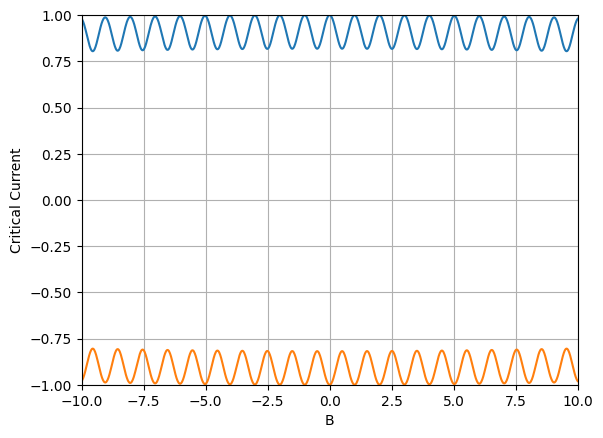

In [37]:
plt.plot(MagField, I_c_max)
plt.plot(MagField, I_c_min)
plt.xlabel('B')
plt.ylabel('Critical Current')
plt.ylim(-1,1) 
plt.xlim(-10,10)
plt.grid()            
plt.show()